### YOLOv5 Face Mask Detection

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 14302, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 14302 (delta 26), reused 25 (delta 8), pack-reused 14242
Receiving objects: 100% (14302/14302), 13.59 MiB | 17.71 MiB/s, done.
Resolving deltas: 100% (9833/9833), done.
/content/yolov5
     |████████████████████████████████| 182 kB 5.2 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 1.6 MB 59.2 MB/s 
     |████████████████████████████████| 42 kB 646 kB/s 
     |████████████████████████████████| 67 kB 5.0 MB/s 
     |████████████████████████████████| 145 kB 31.0 MB/s 
     |████████████████████████████████| 138 kB 69.9 MB/s 
     |████████████████████████████████| 178 kB 70.7 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
Setup complete. Using torch 1.12.1+cu113 (CPU)


In [5]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [6]:
os.environ["DATASET_DIRECTORY"] = "/content/dataset"

In [7]:
# %cd /content/CV/yolov5/Face-mask-detection-1/
%cd /content/yolov5

/content/yolov5


In [8]:
from roboflow import Roboflow
rf = Roboflow(api_key="LcmhAZORxJQg3y7uIYRM")
project = rf.workspace("computer-vision-fm5vi").project("face-mask-detection-omqi8")
dataset = project.version(2).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/dataset/Face-mask-detection-2 in yolov5pytorch:: 100%|██████████| 4084/4084 [00:00<00:00, 7835.35it/s]


In [9]:
!python train.py --img 300 --batch 16 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/dataset/Face-mask-detection-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=300, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-23-g5dc1ce4 Python-3.8.15 torch-1.12.1+cu113 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7,

In [10]:
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Launching TensorBoard...

KeyboardInterrupt: ignored

In [54]:
!python detect.py --weights runs/train/exp4/weights/best.pt --img 320 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp4/weights/best.pt'], source=/content/dataset/Face-mask-detection-2/test/images, data=data/coco128.yaml, imgsz=[300, 300], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-23-g5dc1ce4 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size [300, 300] must be multiple of max stride 32, updating to [320, 320]
image 1/84 /content/dataset/Face-mask-detection-2/test/images/maksssksksss103_png.rf.191ceebae6aaa5fa822bce2e7d418978.jpg: 320x320 4 with_masks, 1 without_mask, 8.9ms
image 2/84 /content/dataset/Face-mask-detection-2/test/ima

In [57]:
!python val.py --data {dataset.location}/data.yaml --weights runs/train/exp4/weights/best.pt

val: data=/content/dataset/Face-mask-detection-2/data.yaml, weights=['runs/train/exp4/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-23-g5dc1ce4 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/dataset/Face-mask-detection-2/valid/labels.cache... 170 images, 0 backgrounds, 0 corrupt: 100% 170/170 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 6/6 [00:05<00:00,  1.01it/s]
                   all        170        859      0.641      0.608      0.616      0.315
 mask_weared_incorrect        170         26      0.305      0.231      0.19

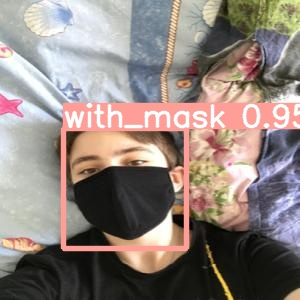

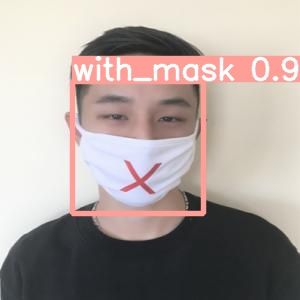

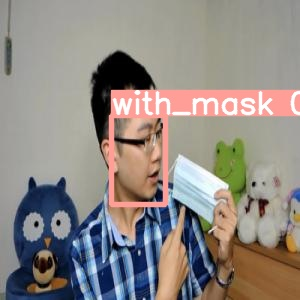

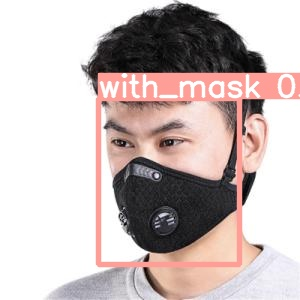

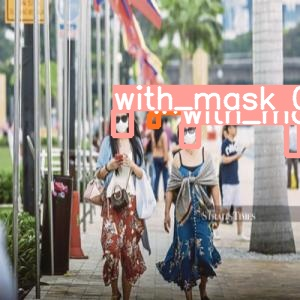

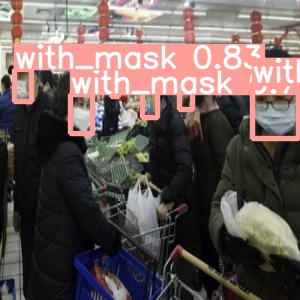

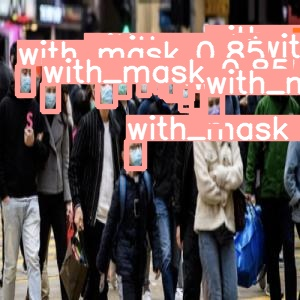

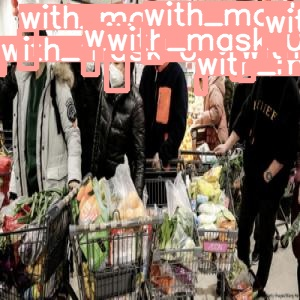

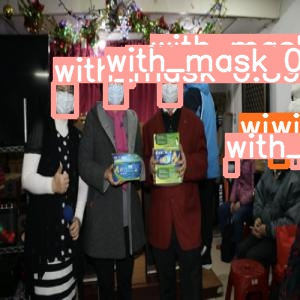

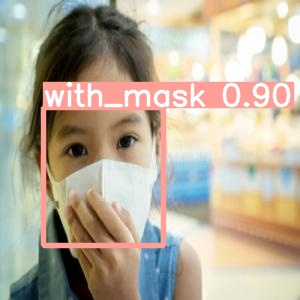

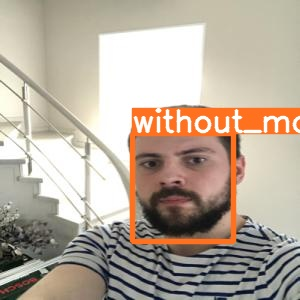

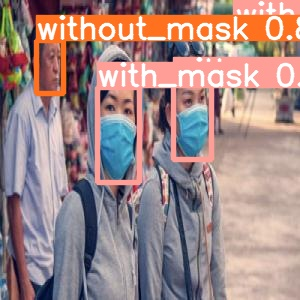

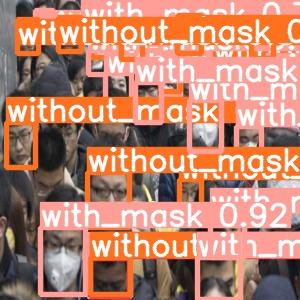

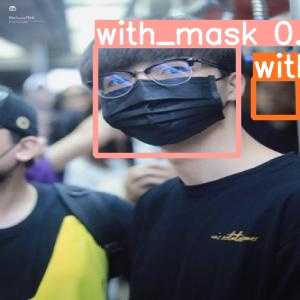

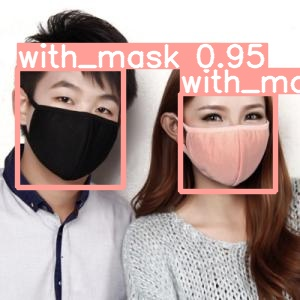

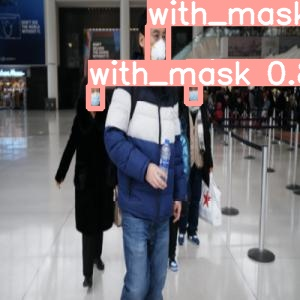

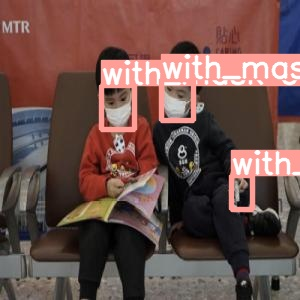

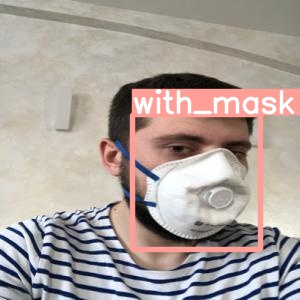

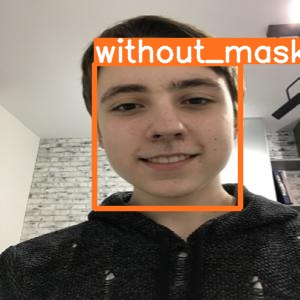

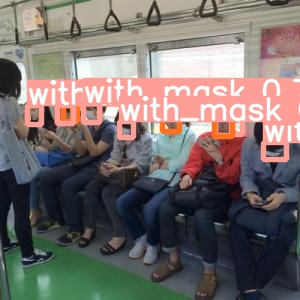

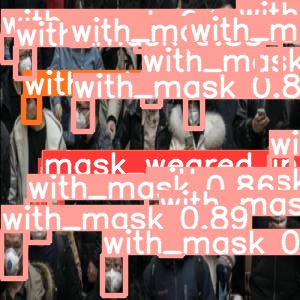

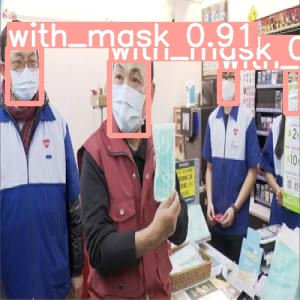

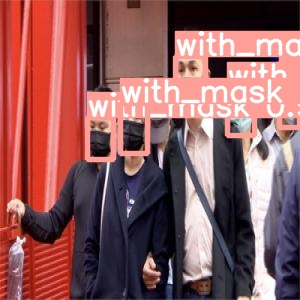

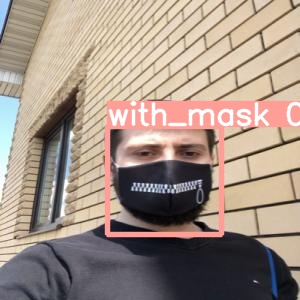

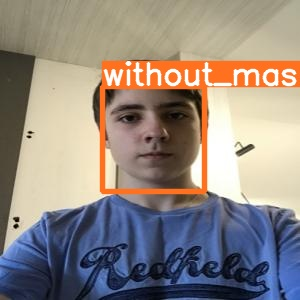

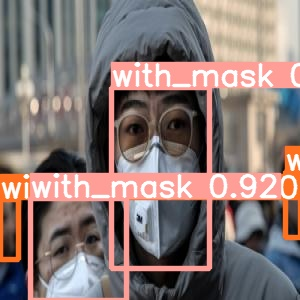

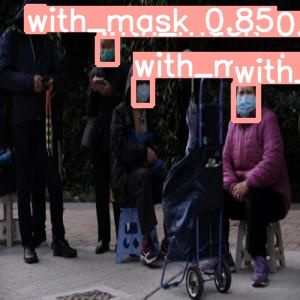

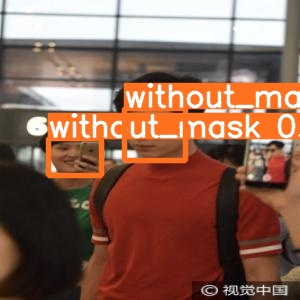

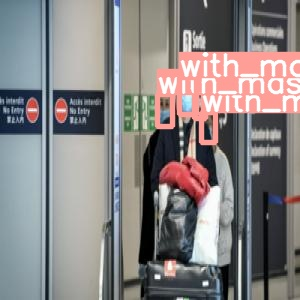

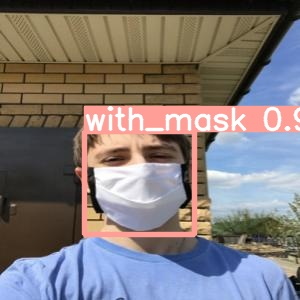

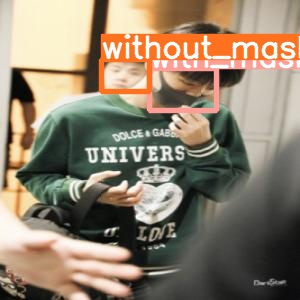

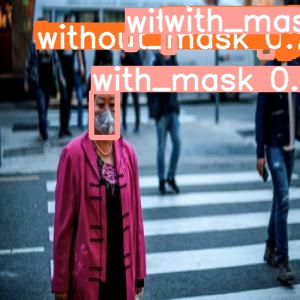

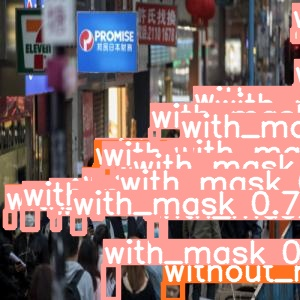

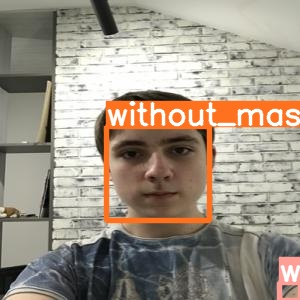

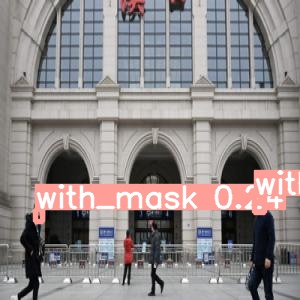

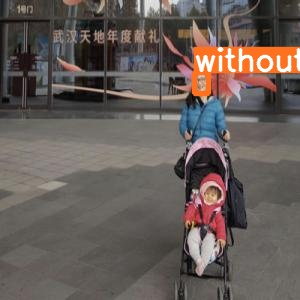

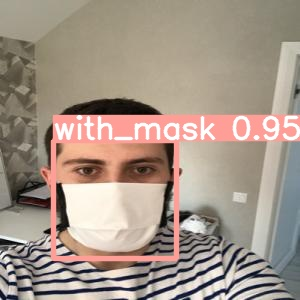

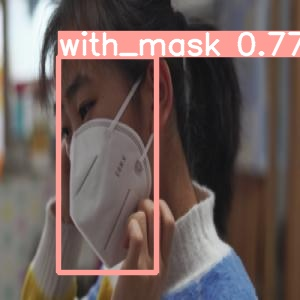

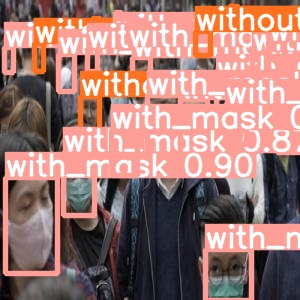

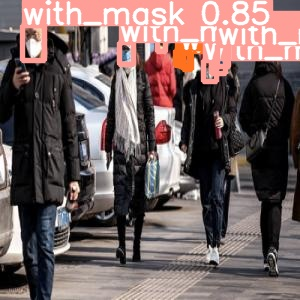

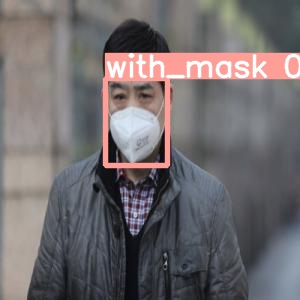

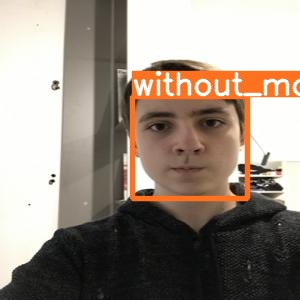

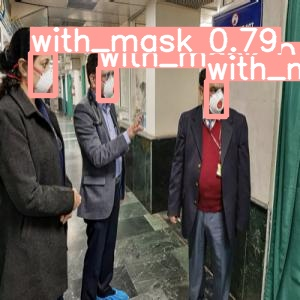

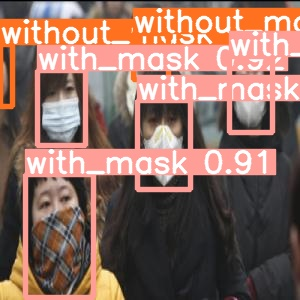

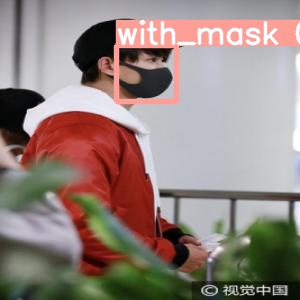

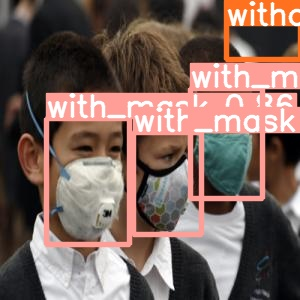

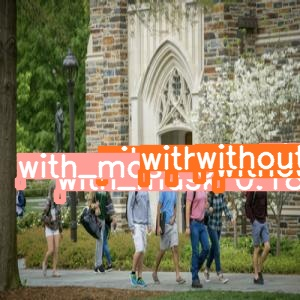

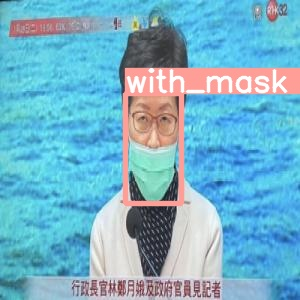

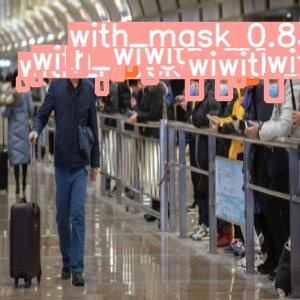

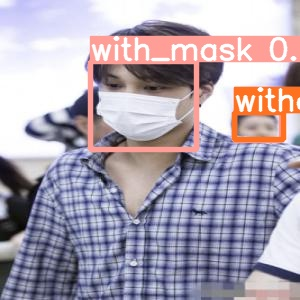

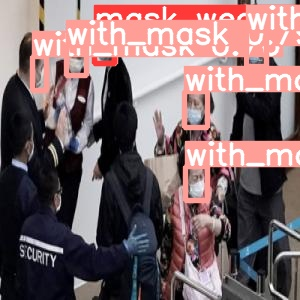

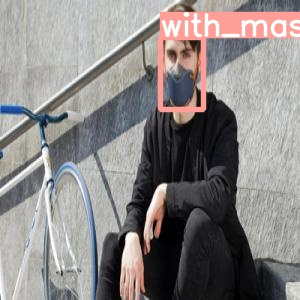

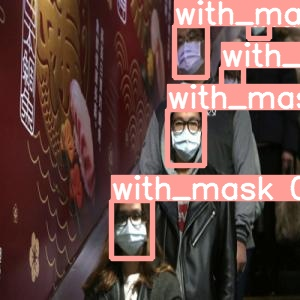

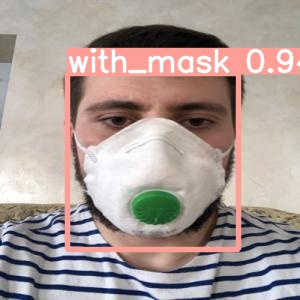

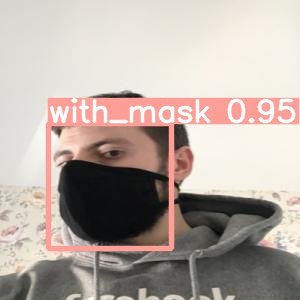

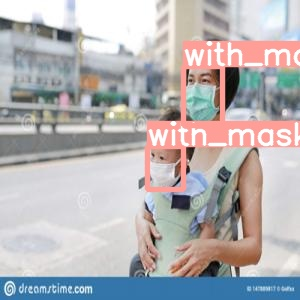

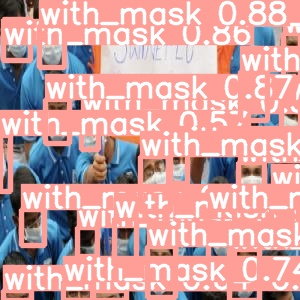

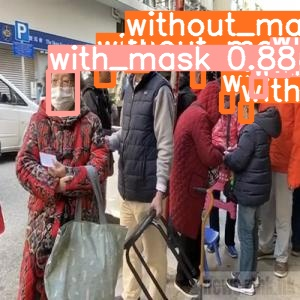

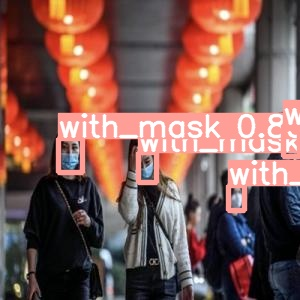

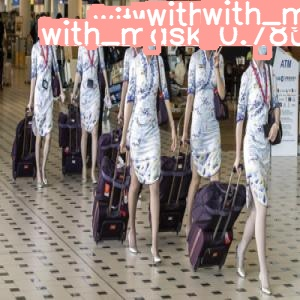

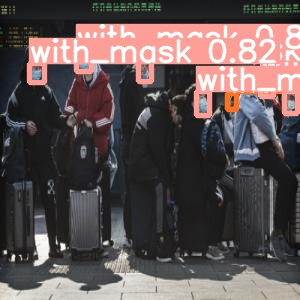

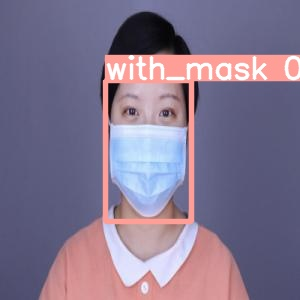

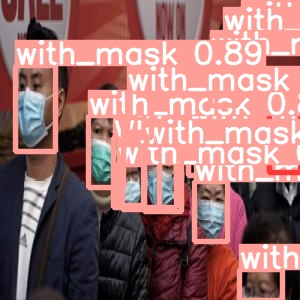

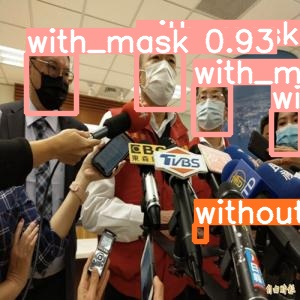

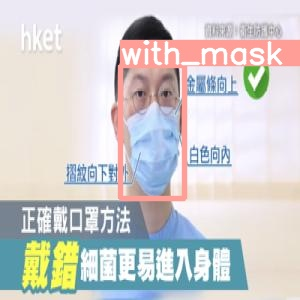

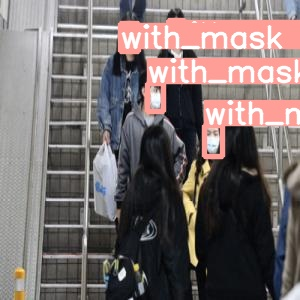

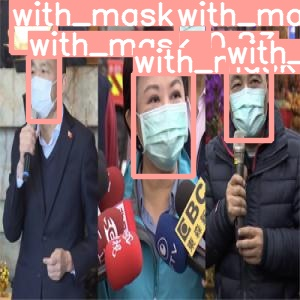

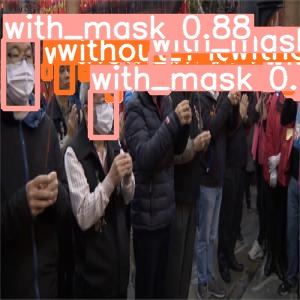

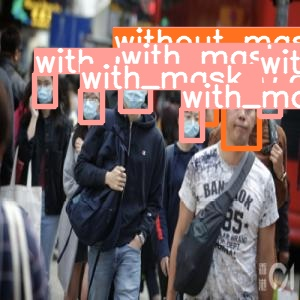

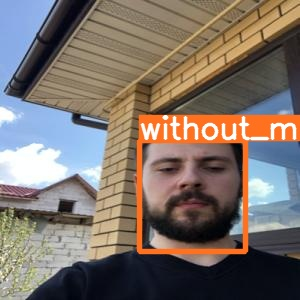

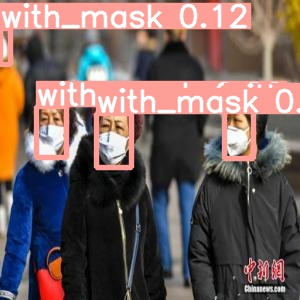

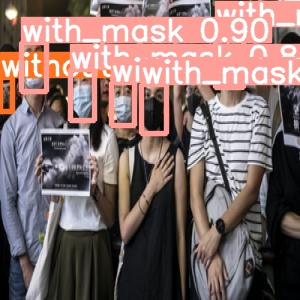

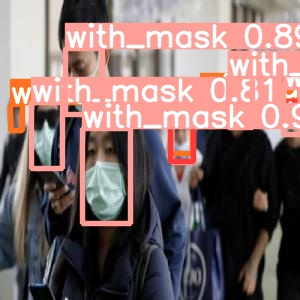

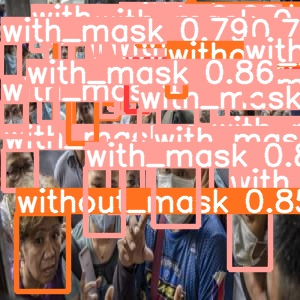

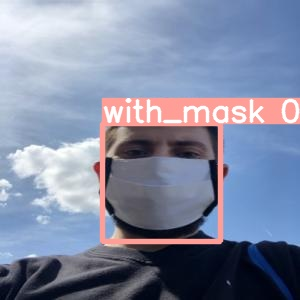

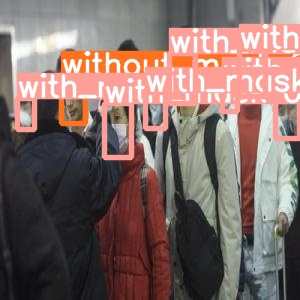

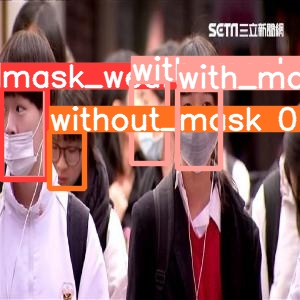

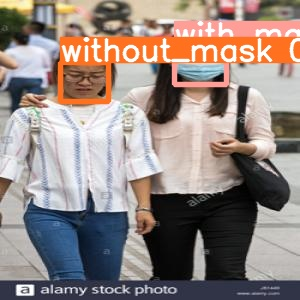

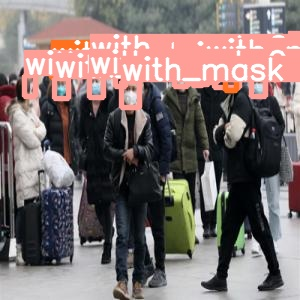

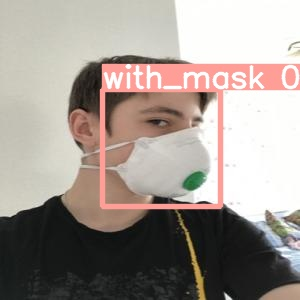

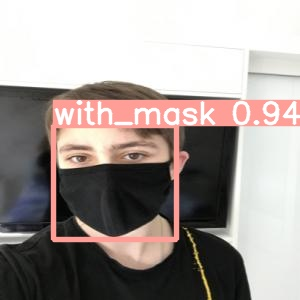

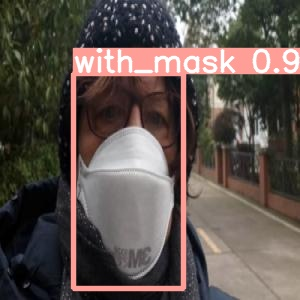

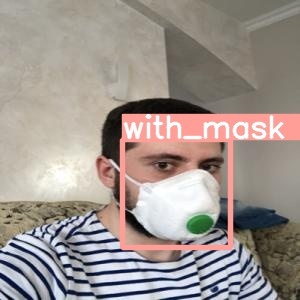

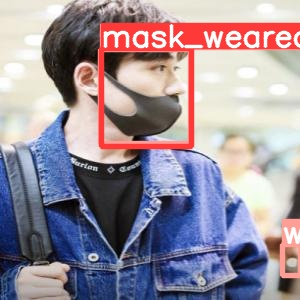

In [60]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp6/*.jpg'): 
    display(Image(filename=imageName))
    print("\n")